In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
from datetime import datetime
from datetime import timedelta  
import time
from uszipcode import SearchEngine
from geopy.distance import geodesic
%matplotlib inline  

In [3]:
df = pd.read_csv('analyze_me.csv')

In [4]:
df.shape

(5983, 18)

In [5]:
df.head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,00:19:58.582052,40.744607,-73.990742,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,00:25:09.107093,40.723080,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.65491,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,00:06:44.541717,40.728478,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,NaN,40.738868,-74.002747,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),00:03:45.035418,40.726110,-74.002492,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595


In [6]:
df.describe()

,delivery_id,customer_id,jumpman_id,item_quantity,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon
count,5.983000e+03,5983.000000,5983.000000,4753.000000,5983.000000,5983.000000,5983.000000,5983.000000
mean,1.379495e+06,176472.595521,102661.602541,1.248264,40.741425,-73.987101,40.744216,-73.985765
std,6.459397e+04,116414.487842,48607.211795,0.785904,0.022833,0.014896,0.025251,0.018060
min,1.271706e+06,242.000000,3296.000000,1.000000,40.665611,-74.015837,40.649356,-74.017679
25%,1.322792e+06,77817.000000,60761.000000,1.000000,40.724340,-73.996630,40.725307,-74.000297
50%,1.375689e+06,131093.000000,113364.000000,1.000000,40.735677,-73.988682,40.740424,-73.989280
75%,1.436371e+06,293381.000000,143807.000000,1.000000,40.758726,-73.980739,40.763885,-73.974696
max,1.491424e+06,405547.000000,181543.000000,16.000000,40.818082,-73.920980,40.848324,-73.924124


In [7]:
for i in df.columns:
    print(i,df[i].nunique())

delivery_id 5214
customer_id 3192
jumpman_id 578
vehicle_type 7
pickup_place 898
place_category 57
item_name 2277
item_quantity 11
item_category_name 767
how_long_it_took_to_order 2579
pickup_lat 1210
pickup_lon 1179
dropoff_lat 2841
dropoff_lon 2839
when_the_delivery_started 5214
when_the_Jumpman_arrived_at_pickup 4719
when_the_Jumpman_left_pickup 4717
when_the_Jumpman_arrived_at_dropoff 5214


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5983 entries, 0 to 5982
Data columns (total 18 columns):
delivery_id                            5983 non-null int64
customer_id                            5983 non-null int64
jumpman_id                             5983 non-null int64
vehicle_type                           5983 non-null object
pickup_place                           5983 non-null object
place_category                         5100 non-null object
item_name                              4753 non-null object
item_quantity                          4753 non-null float64
item_category_name                     4753 non-null object
how_long_it_took_to_order              3038 non-null object
pickup_lat                             5983 non-null float64
pickup_lon                             5983 non-null float64
dropoff_lat                            5983 non-null float64
dropoff_lon                            5983 non-null float64
when_the_delivery_started              5983 non-nul

In [9]:
df['when_the_delivery_started'] = df['when_the_delivery_started'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S.%f'))



In [10]:
df['delivery_start_hour'] = df['when_the_delivery_started'].dt.hour

(array([ 73.,  40.,  22.,   7.,   6.,   0.,   2.,  20.,  31.,  88., 165.,
        323., 411., 318., 265., 253., 289., 457., 751., 940., 715., 454.,
        353.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.]),
 <a list of 23 Patch objects>)

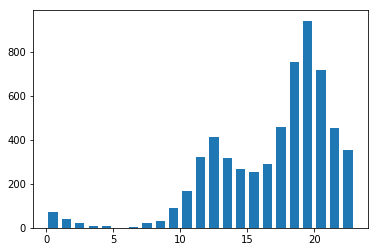

In [11]:
plt.hist(df['delivery_start_hour'],bins=df['delivery_start_hour'].max()-df['delivery_start_hour'].min(), rwidth=.7)


In [14]:
df['when_the_Jumpman_arrived_at_dropoff'] = df['when_the_Jumpman_arrived_at_dropoff'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S.%f'))

In [15]:
df['time_to_deliver'] = df['when_the_Jumpman_arrived_at_dropoff'] - df['when_the_delivery_started'] 

In [16]:
df['time_to_deliver'] = df['time_to_deliver'].apply(lambda x: round(x/np.timedelta64(1,'m')))

In [17]:
df['time_to_deliver'].max()

340

(array([  1.,   2.,   0.,   0.,   1.,   4.,   3.,   2.,   9.,   9.,   7.,
          9.,  12.,  21.,  36.,  39.,  34.,  50.,  81.,  60.,  66.,  58.,
         95., 100., 115., 119., 122., 125., 140., 158., 155., 168., 130.,
        144., 140., 146., 151., 158., 148., 154., 141., 136., 132., 137.,
        111., 155., 115., 119.,  97., 114., 104.,  92.,  96., 104.,  86.,
         85.,  70.,  79.,  49.,  60.,  42.,  31.,  57.,  56.,  55.,  29.,
         35.,  33.,  34.,  31.,  30.,  19.,  37.,  21.,  31.,  24.,  19.,
         12.,  16.,  11.,  13.,  12.,  22.,  22.,  18.,   9.,  20.,   8.,
          9.,  14.,   8.,  12.,   7.,   3.,   7.,   6.,   7.,   8.,   3.,
          3.,   6.,   0.,   3.,   0.,   3.,   5.,   4.,   4.,   2.,   4.,
          3.,   2.,   7.,   0.,   0.,   2.,   6.,   0.,   1.,   6.,   1.,
          1.,   0.,   2.,   0.,   2.,   0.,   1.,   2.,   0.,   1.,   0.,
          2.,   0.,   0.,   0.,   0.,   6.,   0.,   0.,   1.,   1.,   0.,
          1.,   1.,   0.,   0.,   0., 

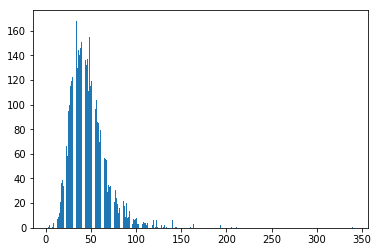

In [18]:
plt.hist(df['time_to_deliver'],bins=df['time_to_deliver'].max()-df['time_to_deliver'].min(), rwidth=.7)


In [19]:
delivery_start_hour = df.groupby('delivery_start_hour',as_index=False).agg({'time_to_deliver': ['median', 'mean']})

In [20]:
delivery_start_hour.head()

delivery_start_hour time_to_deliver           
                               median       mean
0                   0            36.0  36.356164
1                   1            41.0  42.175000
2                   2            40.5  41.727273
3                   3            43.0  43.714286
4                   4            60.5  64.833333

<BarContainer object of 23 artists>

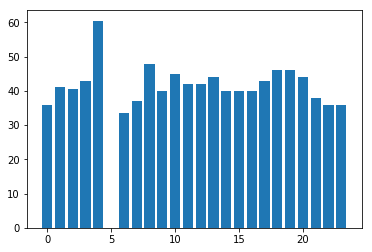

In [21]:
plt.bar(delivery_start_hour['delivery_start_hour'], delivery_start_hour['time_to_deliver']['median'])

In [22]:
f = lambda x: np.nan if pd.isnull(x) else round(pd.to_timedelta(x).total_seconds()/60)

In [23]:
df['how_long_it_took_to_order'] = df['how_long_it_took_to_order'].apply(lambda x: f(x))



In [24]:
df['how_long_it_took_to_order'].head()

0    20.0
1    25.0
2     7.0
3     NaN
4     4.0
Name: how_long_it_took_to_order, dtype: float64

In [25]:
df['how_long_it_took_to_order'].max()-df['how_long_it_took_to_order'].min()

72.0

In [26]:
df['how_long_it_took_to_order'].median()

6.0

(array([  2., 102., 308., 375., 422., 387., 317., 252., 148., 149., 111.,
         75.,  45.,  53.,  45.,  38.,  27.,  27.,  27.,  16.,  15.,  18.,
         13.,   8.,   8.,   6.,  12.,   2.,   1.,   5.,   4.,   5.,   1.,
          0.,   2.,   1.,   1.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
        53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
        66., 67., 68., 69., 70., 71., 72., 73.]),
 <a list of 72 Patch objects>)

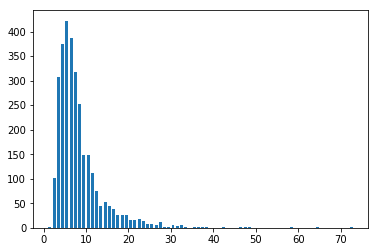

In [27]:
plt.hist(df[pd.notnull(df['how_long_it_took_to_order'])]['how_long_it_took_to_order'],bins=72, rwidth=.7)
# round(df_time_to_order['how_long_it_took_to_order'].max()-df_time_to_order['how_long_it_took_to_order'].min())



In [28]:
df.groupby('vehicle_type').agg({'time_to_deliver': ['median', 'mean']})

time_to_deliver           
                      median       mean
vehicle_type                           
bicycle                 41.0  44.013804
car                     48.0  52.023868
motorcycle              44.0  47.190476
scooter                 45.0  47.320000
truck                   63.0  65.791667
van                     47.5  50.381579
walker                  45.0  46.806569

In [30]:
search = SearchEngine(simple_zipcode=True) # set simple_zipcode=False to use rich info database


In [31]:
f = lambda x, y : search.by_coordinates(lat=x, lng=y, returns=1)[0].to_dict()['zipcode']

In [32]:
df['pickup_zipcode'] = df[['pickup_lat','pickup_lon']].apply(lambda x : f(*x), axis=1)


In [33]:
df['dropoff_zipcode'] = df[['dropoff_lat','dropoff_lon']].apply(lambda x : f(*x), axis=1)


In [34]:
df.groupby('pickup_zipcode',as_index=False).agg({'time_to_deliver': ['median', 'mean', 'count', 'nunique']},).head()

pickup_zipcode time_to_deliver                         
                          median       mean count nunique
0          10001            45.0  47.497093   344      76
1          10002            42.5  46.818533   518      92
2          10003            41.0  44.074648   710      88
3          10005            28.0  31.800000     5       5
4          10006            96.5  96.500000     2       2

In [35]:
df.groupby('dropoff_zipcode',as_index=False).agg({'time_to_deliver': ['median', 'mean', 'count', 'nunique']},).head()

dropoff_zipcode time_to_deliver                         
                           median       mean count nunique
0           10001            41.0  43.016667   360      68
1           10002            40.0  43.695817   263      74
2           10003            39.0  42.529865   519      78
3           10005            48.0  47.800000    35      21
4           10006            61.0  63.603774    53      33

In [41]:
f = lambda a,b,c,d : geodesic((a,b), (c,d)).miles

In [42]:
df['distance'] = df[['pickup_lat','pickup_lon', 'dropoff_lat', 'dropoff_lon']].apply(lambda x : f(*x), axis=1)

In [43]:
df['distance_rounded'] = round(df['distance'],1)

(array([1565., 3013.,  862.,  311.,  140.,   64.,   21.,    7.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 8 Patch objects>)

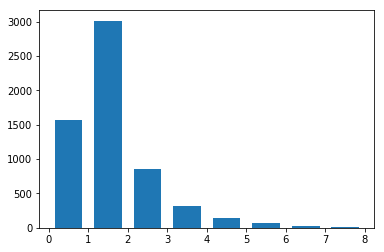

In [44]:
plt.hist(round(df['distance']),bins=int(round(df['distance']).max()-round(df['distance']).min()), rwidth=.7)


In [45]:
df['distance_rounded'] = round(df['distance'])

In [46]:
distance_rounded = df.groupby('distance_rounded',as_index=False).agg({'time_to_deliver': ['count','median', 'mean']})

In [47]:
distance_rounded

distance_rounded time_to_deliver                   
                             count median        mean
0              0.0            1565   34.0   37.534185
1              1.0            3013   42.0   44.989047
2              2.0             862   51.0   53.733179
3              3.0             311   59.0   62.086817
4              4.0             140   58.0   63.685714
5              5.0              64   71.5   72.406250
6              6.0              21   73.0   72.619048
7              7.0               5   85.0   91.400000
8              8.0               2  112.0  112.000000

<BarContainer object of 9 artists>

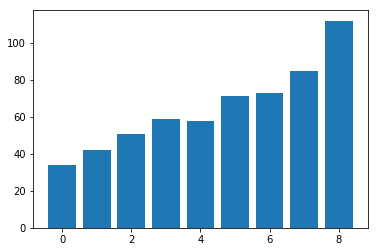

In [48]:
plt.bar(distance_rounded['distance_rounded'], distance_rounded['time_to_deliver']['median'])

In [49]:
df.to_csv('analyze_me_cleaned.csv')